# Basic Adaptive Policy Trial

In [13]:
%load_ext autoreload
%autoreload 2

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hvplot.pandas
import adaptive_nof1

# Quick tests without costly sampling

In [7]:
from adaptive_nof1.metrics import SimpleRegret, FrequentistOptimalSelection
from adaptive_nof1.simulation import Simulation

metrics = [SimpleRegret(), FrequentistOptimalSelection()]
df, simulations = Simulation.simulation_study(
    [SinotModel("sinot/example/example_params.json") for _ in range(7 * 10)],
    [
        BlockPolicy(
            FixedPolicy(
                number_of_actions=2,
            ),
            block_length=20,
        ),
        BlockPolicy(
            FrequentistEpsilonGreedy(
                number_of_actions=2,
                epsilon=0.1,
            ),
            block_length=20,
        ),
        BlockPolicy(
            FrequentistEpsilonGreedy(
                number_of_actions=2,
                epsilon=0.5,
            ),
            block_length=20,
        ),
        BlockPolicy(
            FrequentistExploreThenCommit(number_of_actions=2, explore_blocks=4),
            block_length=20,
        ),
        BlockPolicy(
            ThompsonSampling(
                number_of_actions=2,
            ),
            block_length=20,
        ),
        BlockPolicy(
            UpperConfidenceBound(
                number_of_actions=2,
                epsilon=0.05,
            ),
            block_length=20,
        ),
        BlockPolicy(
            UpperConfidenceBound(
                number_of_actions=2,
                epsilon=0.2,
            ),
            block_length=20,
        ),
    ]
    * 10,
    metrics,
    200,
)

AttributeError: type object 'Simulation' has no attribute 'simulation_study'

/var/folders/2g/v44yvb1n6sdgnp5mwbh8_qgc0000gn/T/ipykernel_6163/1748330870.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


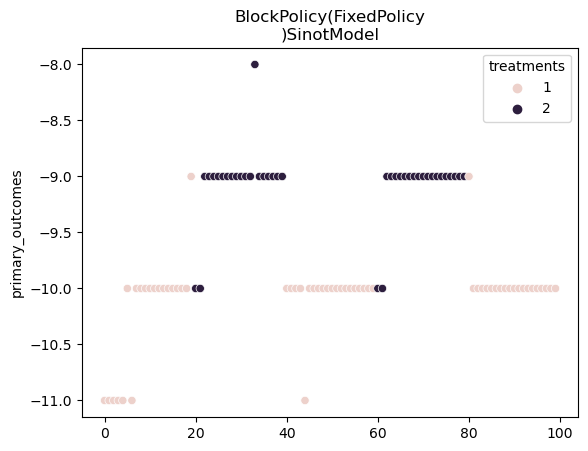

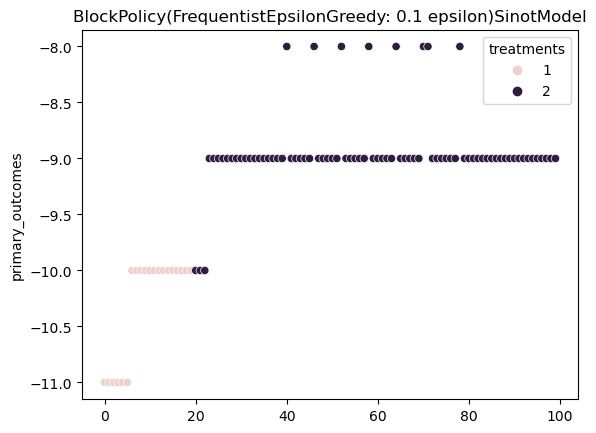

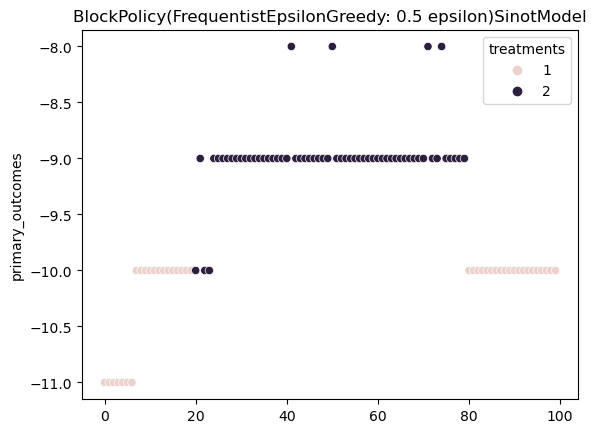

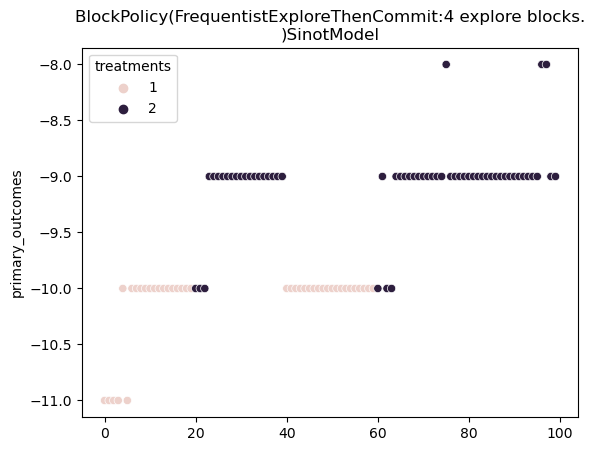

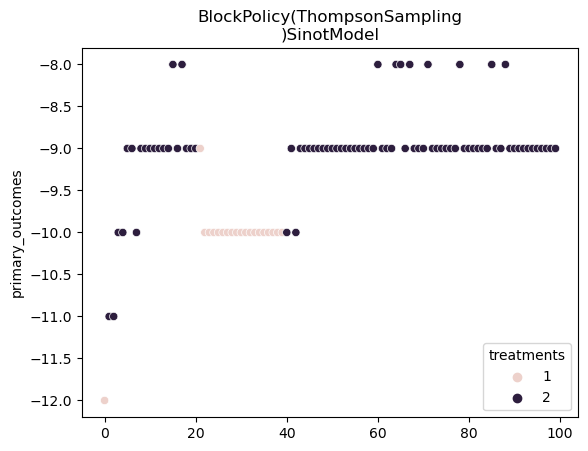

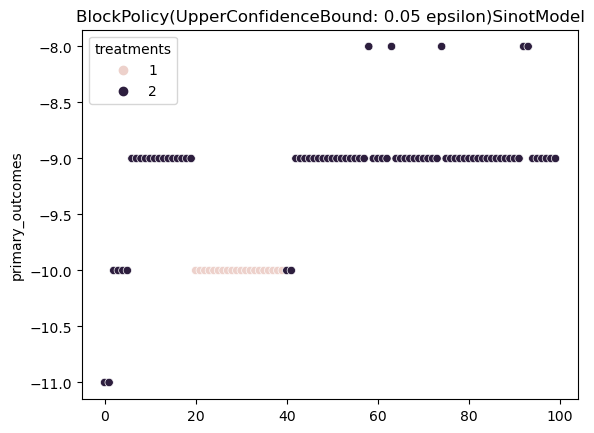

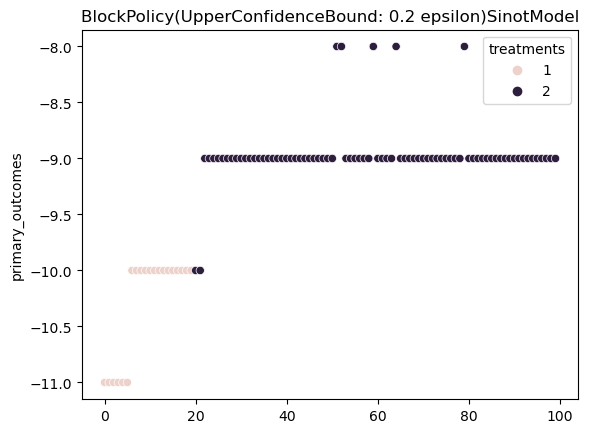

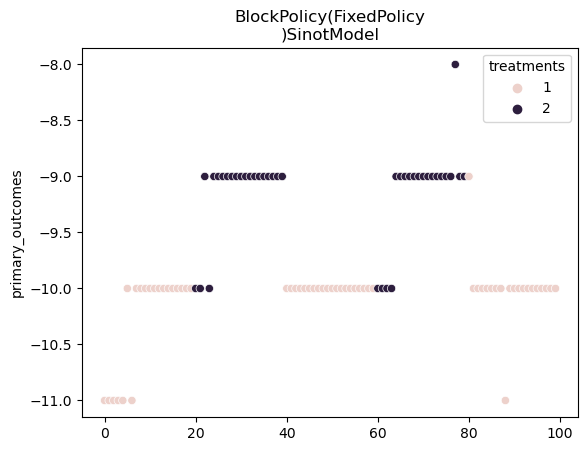

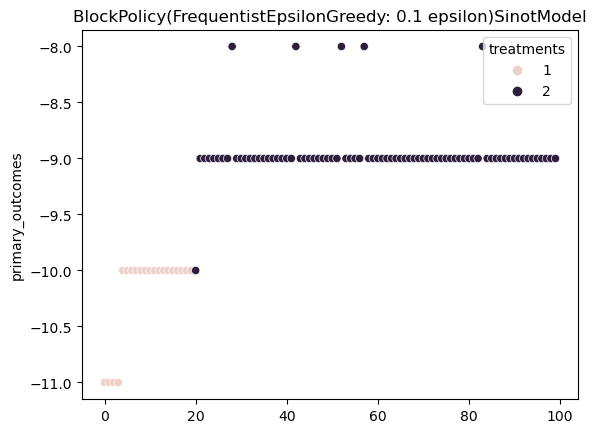

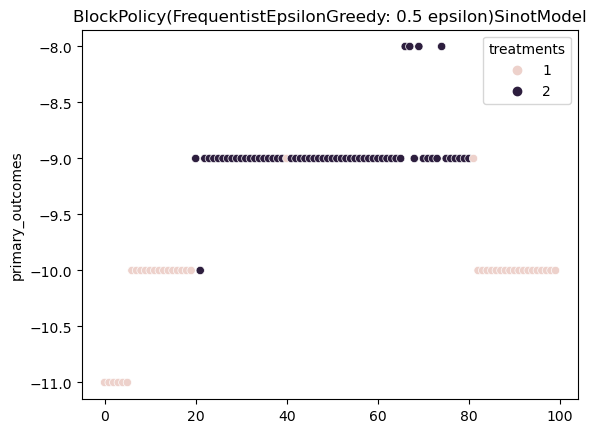

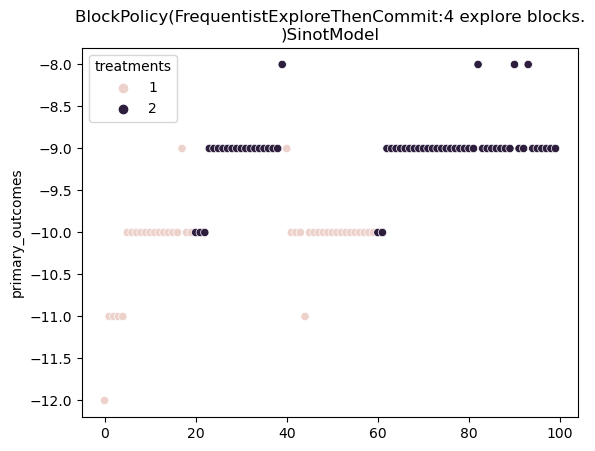

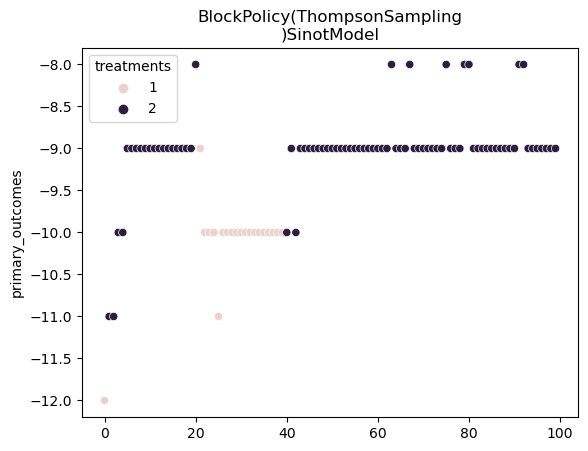

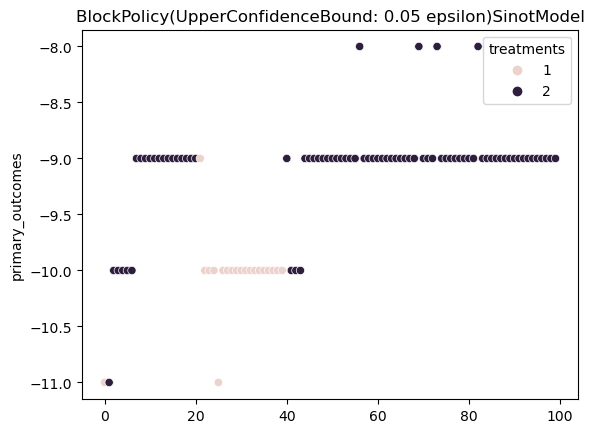

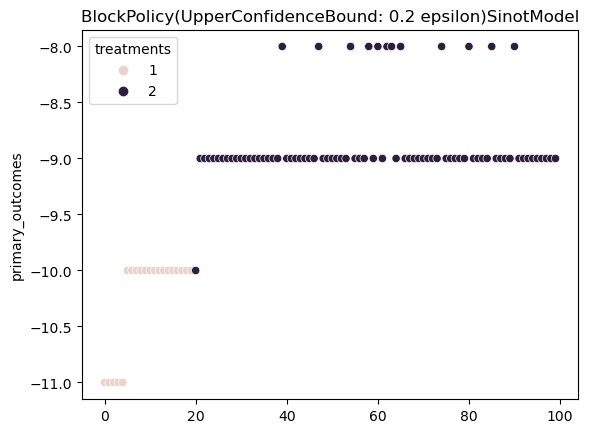

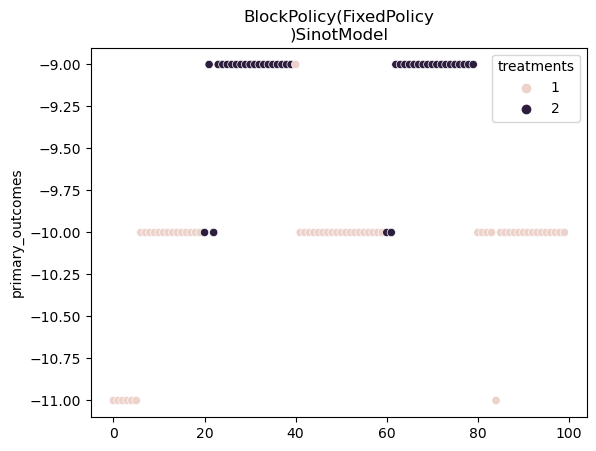

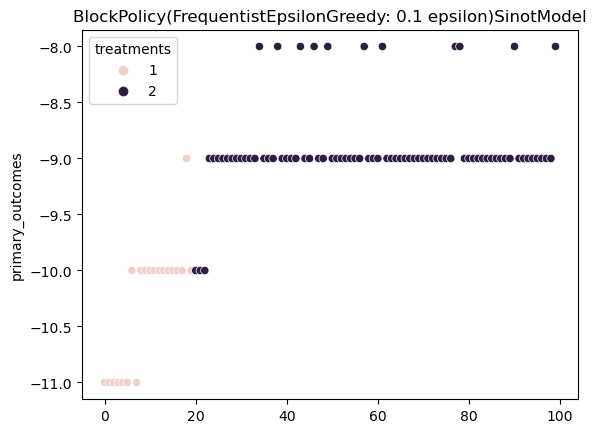

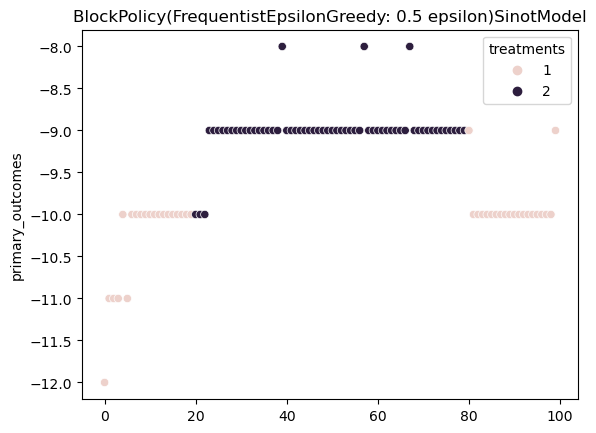

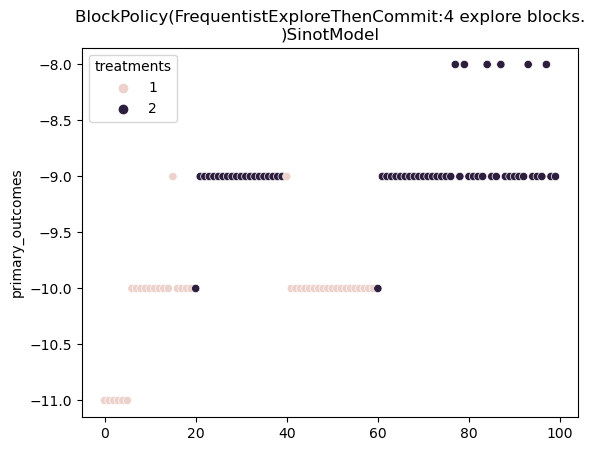

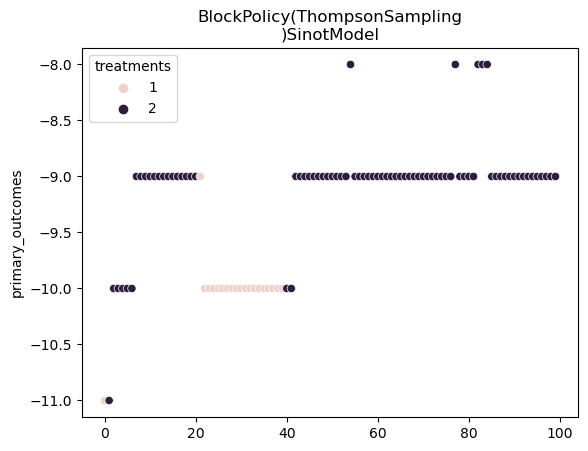

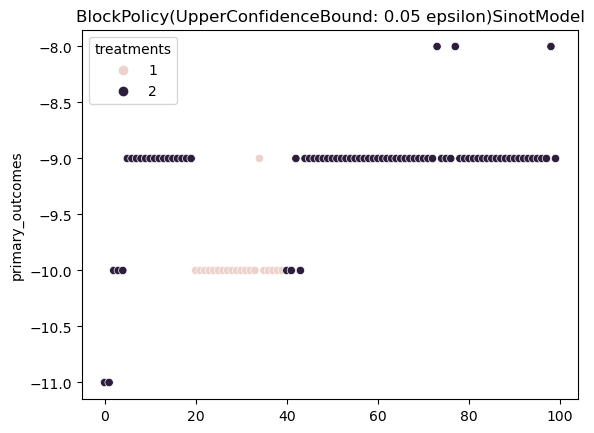

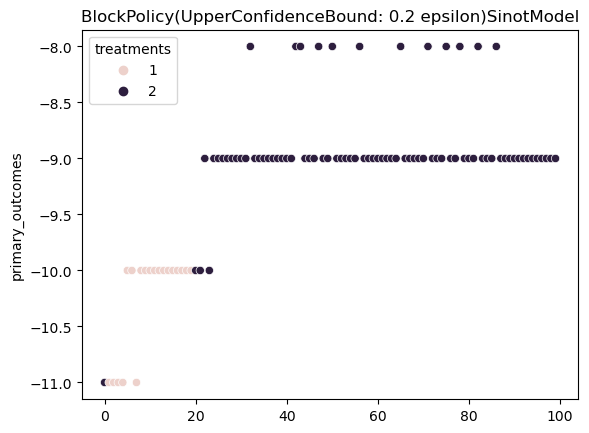

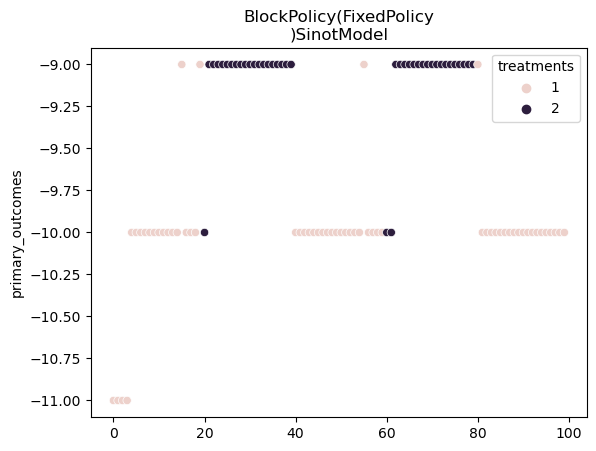

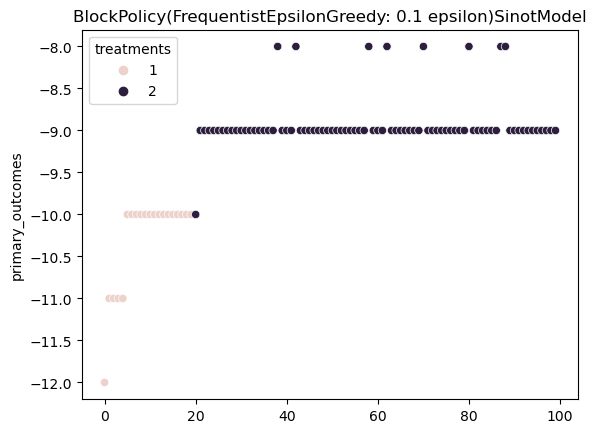

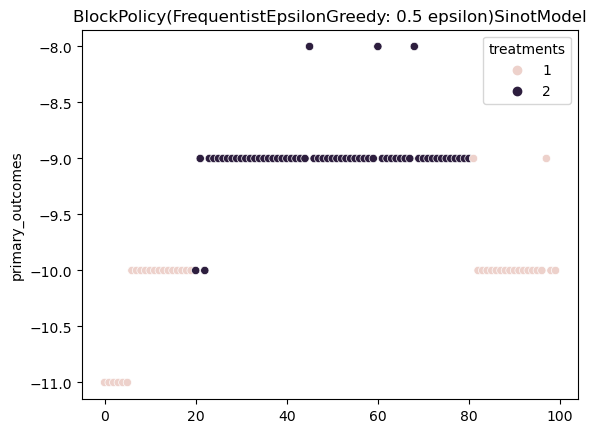

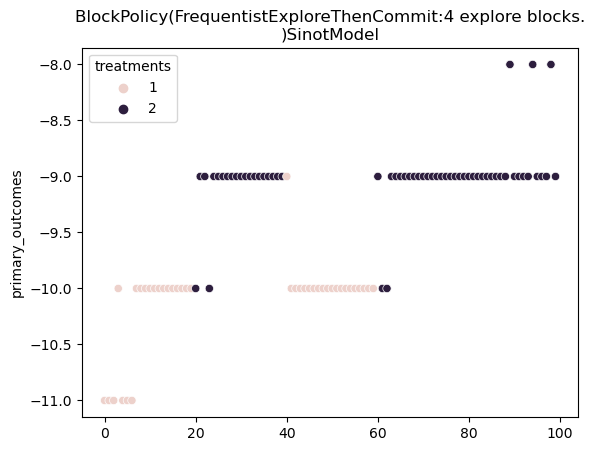

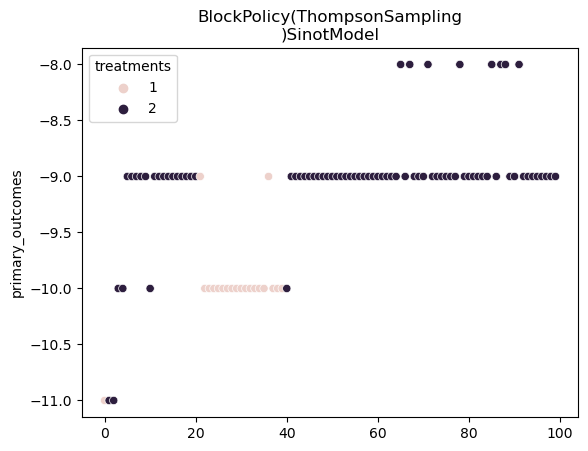

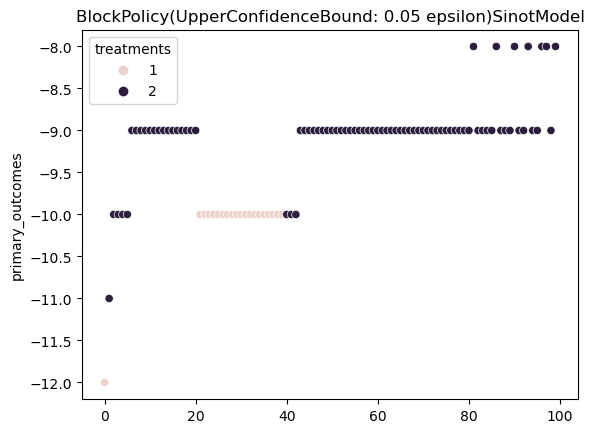

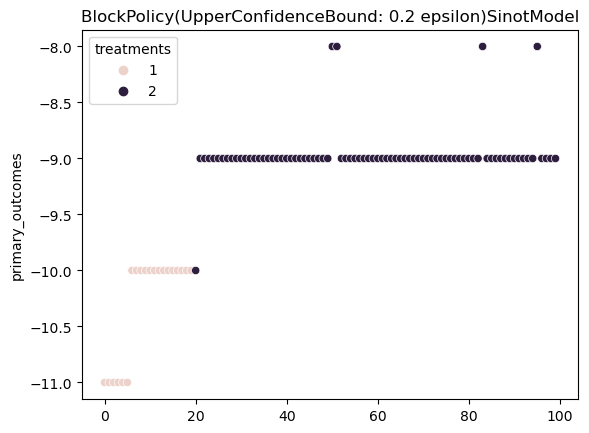

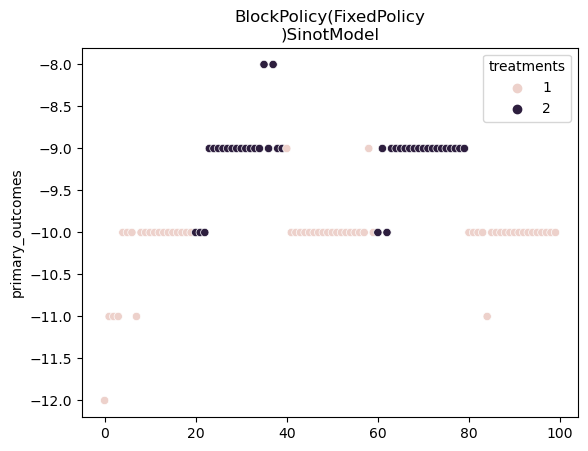

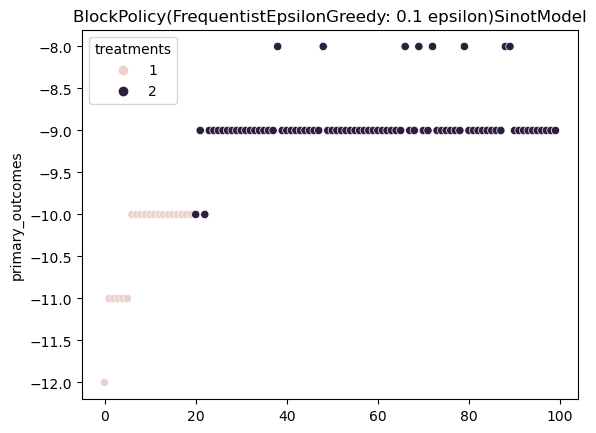

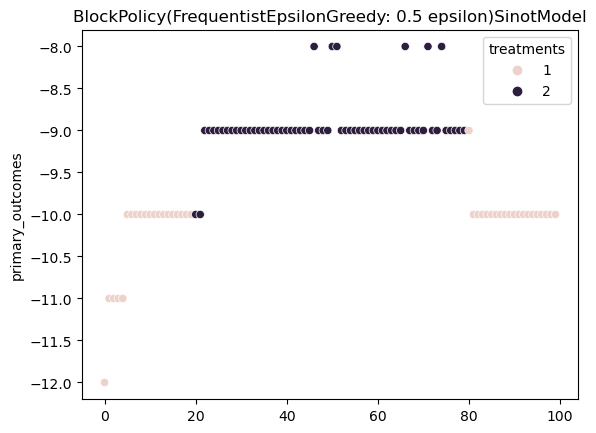

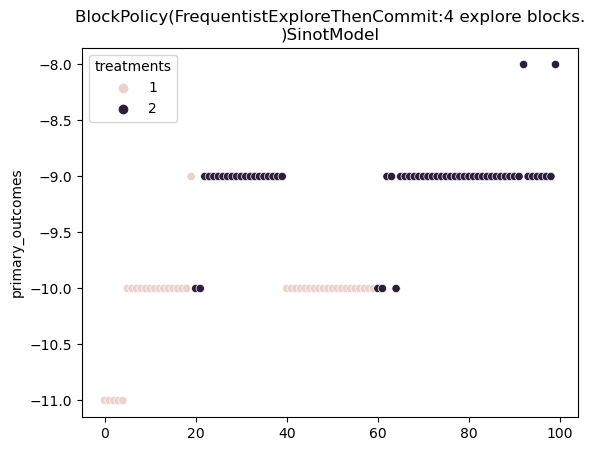

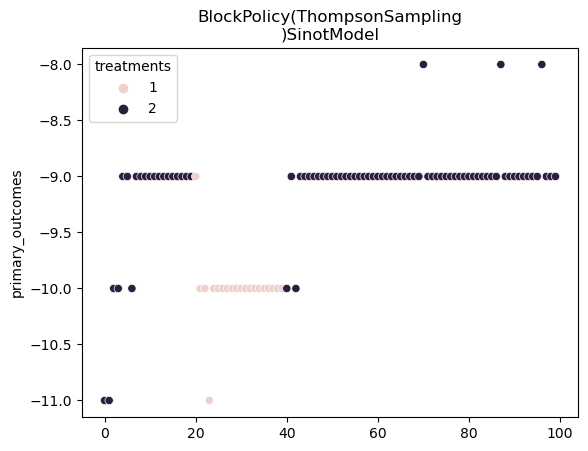

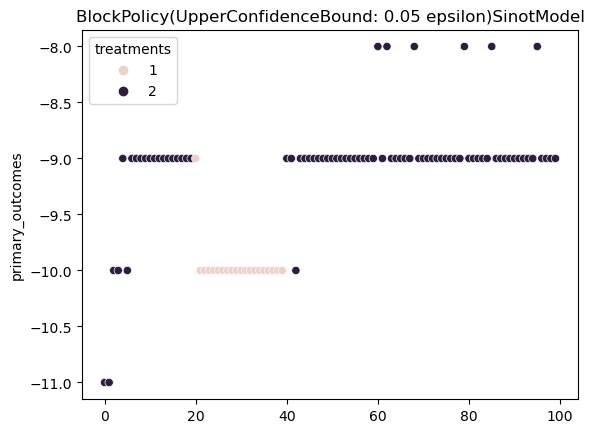

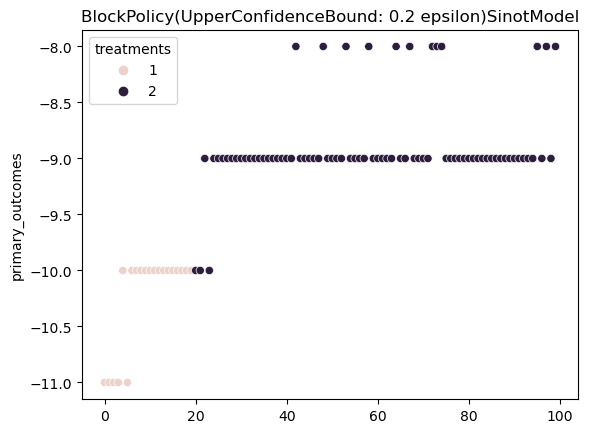

In [46]:
for simulation in simulations:
    plt.figure()
    simulation.plot()

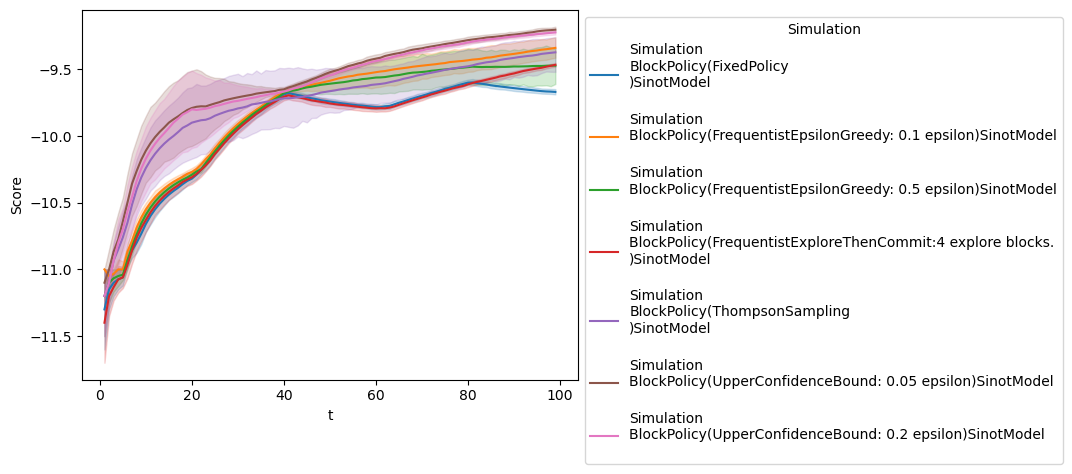

In [70]:
df = score_df_iterative(simulations, [SimpleRegret()], range(1, 100))
ax = sns.lineplot(data=df, x="t", y="Score", hue="Simulation")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Testing the SinotSimulation with different patients under the same policy (similar to series of N-of-1 Trials)

In [50]:
from adaptive_nof1 import *
from adaptive_nof1.policies import *
from adaptive_nof1.metrics import (
    plot_score,
    SimpleRegret,
    FrequentistOptimalSelection,
    score_df,
    RegretAgainstConstantPolicy,
)
from adaptive_nof1.models import SinotModel

In [51]:
# series_thompson_sampling = SeriesOfSimulations(
#   lambda patient_id: SinotModel("../src/sinot/example/example_params.json", patient_id),
#   10,
#   ThompsonSampling(
#       number_of_actions= 2,
#   ),
# )
series_epsilon_greedy = SeriesOfSimulations(
    lambda patient_id: SinotModel(
        "../src/sinot/example/example_params.json", patient_id
    ),
    10,
    FrequentistEpsilonGreedy(
        number_of_actions=2,
        epsilon=0.1,
    ),
)
series_fixed_schedule = SeriesOfSimulations(
    lambda patient_id: SinotModel(
        "../src/sinot/example/example_params.json", patient_id
    ),
    10,
    FixedPolicy(
        number_of_actions=2,
    ),
)
# series

Step:   0%|          | 0/100 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Step:   0%|          | 0/100 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

In [56]:
SeriesOfSimulations.plot_lines(
    [series, series_epsilon_greedy, series_fixed_schedule],
    RegretAgainstConstantPolicy(2),
)

KeyboardInterrupt: 

In [84]:
pd.melt(
    RegretAgainstConstantPolicy(2).score_simulations(series.simulations),
    var_name="simulation",
    value_name="score",
    ignore_index=False,
)

,simulation,score
0,0,-2.0
1,0,-2.0
2,0,-1.0
3,0,-1.0
4,0,-1.0
...,...,...
95,9,1.0
96,9,1.0
97,9,1.0
98,9,0.0


In [94]:
SeriesOfSimulations.plot_lines(
    [series_epsilon_greedy], [RegretAgainstConstantPolicy(2)]
)

AttributeError: 'list' object has no attribute 'score_simulations'

In [95]:
# Thompson Sampling
series.plot_allocations()

HoloViews(HeatMap, height=300, sizing_mode='fixed', width=700)

In [82]:
series_fixed_schedule.plot_allocations()

HoloViews(HeatMap, height=300, sizing_mode='fixed', width=700)